LAB ASSIGNMENT - 2

21MIA1121
VISHAAL S

In [ ]:
!apt update
!apt install -y ffmpeg
!pip install ffmpeg-python


Lab Task 1: Setup and Basic **Extraction**

In [67]:
import ffmpeg
import os

def extract_and_save_frames(video_path, output_dir, frame_rate=1):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    try:
        (
            ffmpeg
            .input(video_path)
            .filter('fps', fps=frame_rate)
            .output(f'{output_dir}/frame_%04d.png')
            .run(capture_stderr=True, capture_stdout=True)
        )
        print(f"Frames saved in {output_dir}")
    except ffmpeg.Error as e:
        print(f"An error occurred: {e.stderr.decode()}")

video_path = 'hello.mov'
output_dir = 'extracted_frames'
extract_and_save_frames(video_path, output_dir, frame_rate=1)

Frames saved in extracted_frames


Lab Task 2: Frame Type **Analysis**

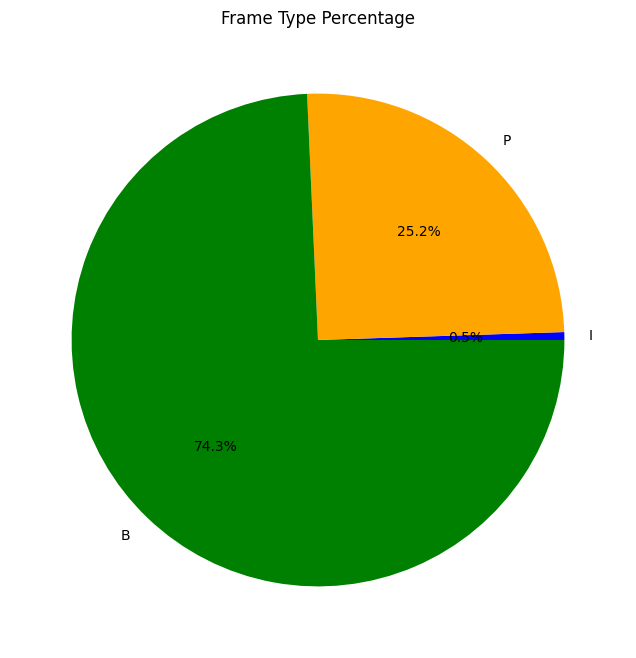

{'I': 0.5141388174807198, 'P': 25.19280205655527, 'B': 74.293059125964}


In [70]:
import subprocess
import json
import matplotlib.pyplot as plt

def analyze_frame_types(video_path):
    command = ['ffprobe','-v', 'error','-select_streams', 'v:0','-show_entries', 'frame=pict_type','-of', 'json',video_path]
    result = subprocess.run(command, capture_output=True, text=True)
    frames_info = json.loads(result.stdout)
    frame_types = {'I': 0, 'P': 0, 'B': 0}


    for frame in frames_info['frames']:
        if 'pict_type' in frame:
            pict_type = frame['pict_type']
            if pict_type in frame_types:
                frame_types[pict_type] += 1

    total_frames = sum(frame_types.values())
    frame_percentages = {k: (v / total_frames) * 100 for k, v in frame_types.items()}

    return frame_percentages

def plot_pie_chart(frame_percentages):
    frame_labels = list(frame_percentages.keys())
    frame_values = [frame_percentages[frame] for frame in frame_percentages]
    plt.figure(figsize=(8, 8))
    plt.pie(frame_values, labels=frame_labels, autopct='%1.1f%%', colors=['blue', 'orange', 'green'])
    plt.title('Frame Type Percentage')
    plt.show()


video_path = 'hello.mov'
frame_percentages = analyze_frame_types(video_path)
plot_pie_chart(frame_percentages)
print(frame_percentages)

Lab Task 3: Visualizing **Frames**

In [71]:
import subprocess
import os

def extract_frames(video_path, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # I
    subprocess.run(['ffmpeg', '-i', video_path, '-vf', 'select="eq(pict_type,I)"','-vsync', 'vfr', os.path.join(output_dir, 'I_frame_%04d.png')])
    # P
    subprocess.run(['ffmpeg', '-i', video_path, '-vf', 'select="eq(pict_type,P)"','-vsync', 'vfr', os.path.join(output_dir, 'P_frame_%04d.png')])
    # B
    subprocess.run(['ffmpeg', '-i', video_path, '-vf', 'select="eq(pict_type,B)"','-vsync', 'vfr', os.path.join(output_dir, 'B_frame_%04d.png')])


video_path = 'hello.mov'
output_dir = 'extracted_frames'
extract_frames(video_path, output_dir)



In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

def display_frames_with_pillow(directory):
    for frame_type in ['I', 'P', 'B']:
        frame_files = [f for f in os.listdir(directory) if f.startswith(f'{frame_type}_frame_')]
        for frame_file in frame_files:
            img_path = os.path.join(directory, frame_file)
            img = Image.open(img_path)

            plt.figure()
            plt.imshow(img)
            plt.title(f'{frame_type} Frame - {frame_file}')
            plt.axis('off')
            plt.show()

display_frames_with_pillow(output_dir)


In [40]:
import subprocess
import os

def extract_frames(video_path, output_dir, frame_type):

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)


    if frame_type == 'I':
        filter_expr = "select='eq(pict_type,I)'"
        output_pattern = 'I_frame_%04d.png'
    elif frame_type == 'P':
        filter_expr = "select='eq(pict_type,P)'"
        output_pattern = 'P_frame_%04d.png'
    elif frame_type == 'B':
        filter_expr = "select='eq(pict_type,B)'"
        output_pattern = 'B_frame_%04d.png'
    else:
        raise ValueError("Invalid frame type. Choose from 'I', 'P', or 'B'.")

    output_path = os.path.join(output_dir, output_pattern)

    command = [
        'ffmpeg', '-i', video_path, '-vf', filter_expr,'-vsync', 'vfr',output_path]


    try:
        subprocess.run(command, check=True)
        print(f"Frames extracted successfully to {output_dir}")
    except subprocess.CalledProcessError as e:
        print(f"Error extracting frames: {e}")


video_file = 'hello.mov'
output_directory = 'extrac'
extract_frames(video_file, output_directory, 'I')
extract_frames(video_file, output_directory, 'P')
extract_frames(video_file, output_directory, 'B')



Frames extracted successfully to extrac
Frames extracted successfully to extrac
Frames extracted successfully to extrac


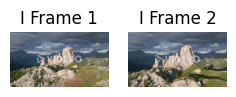

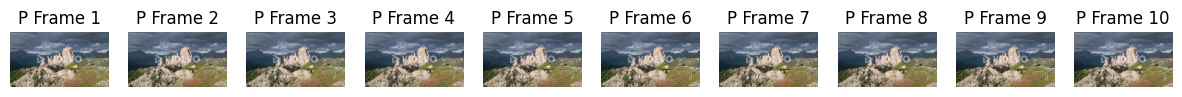

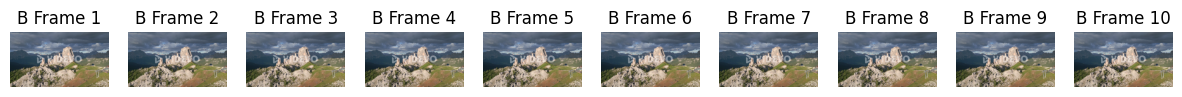

In [44]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

def display_frames(frame_dir, frame_type):
    frame_files = sorted(glob.glob(os.path.join(frame_dir, f'{frame_type}_frame_*.png')))
    if frame_files:
        plt.figure(figsize=(15, 5))
        for i, frame_file in enumerate(frame_files[:10]):
            img = Image.open(frame_file)
            plt.subplot(1, 10, i+1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'{frame_type} Frame {i+1}')
        plt.show()
    else:
        print(f"No {frame_type} frames found.")


display_frames(output_directory, 'I')
display_frames(output_directory, 'P')
display_frames(output_directory, 'B')


Lab Task 4: Frame Compression **Analysis**

In [73]:
import os
import glob

def calculate_frame_sizes(frame_dir, frame_type):
    frame_files = glob.glob(os.path.join(frame_dir, f'{frame_type}_frame_*.png'))
    if not frame_files:
        print(f"No {frame_type} frames found.")
        return 0, 0

    sizes = [os.path.getsize(frame_file) for frame_file in frame_files]
    avg_size = sum(sizes) / len(sizes)
    return avg_size, sizes
output_directory = 'extrac'

avg_size_I, sizes_I = calculate_frame_sizes(output_directory, 'I')
avg_size_P, sizes_P = calculate_frame_sizes(output_directory, 'P')
avg_size_B, sizes_B = calculate_frame_sizes(output_directory, 'B')

print(f"Average size of I frames: {avg_size_I / 1024:.2f} KB")
print(f"Average size of P frames: {avg_size_P / 1024:.2f} KB")
print(f"Average size of B frames: {avg_size_B / 1024:.2f} KB")


print("Sizes of I frames:", sizes_I)
print("Sizes of P frames:", sizes_P)
print("Sizes of B frames:", sizes_B)



Average size of I frames: 1489.45 KB
Average size of P frames: 1553.82 KB
Average size of B frames: 1536.20 KB
Sizes of I frames: [1523187, 1527202]
Sizes of P frames: [1607099, 1606879, 1580083, 1584011, 1616655, 1588805, 1611436, 1606031, 1580826, 1614529, 1612508, 1586583, 1572450, 1571029, 1606324, 1607393, 1605851, 1584000, 1607465, 1600792, 1536420, 1603467, 1574623, 1566268, 1610374, 1569117, 1615627, 1577942, 1582876, 1609028, 1591235, 1599666, 1595049, 1574545, 1599526, 1615953, 1591012, 1606052, 1593571, 1609529, 1574852, 1591909, 1587937, 1585603, 1611797, 1577670, 1617779, 1553028, 1566339, 1613746, 1589731, 1534849, 1618672, 1542496, 1563223, 1588433, 1569932, 1586379, 1608548, 1558966, 1569750, 1539390, 1545142, 1617409, 1582301, 1617483, 1567944, 1579392, 1595007, 1588321, 1563654, 1618671, 1609875, 1606488, 1585948, 1609067, 1607483, 1607904, 1610462, 1586821, 1617050, 1608032, 1586871, 1577677, 1615556, 1609681, 1608573, 1609049, 1617474, 1587076, 1613194, 1609171, 154

2.	Compression Efficiency:

I FRAME - I frames as standalone pictures. They contain the entire image just like a regular photo.Since they have all the information needed to display a full picture, I frames are large in size.example :- flipbook

B FRAME -B Frames are the most efficient, storing minimal changes by using information from both past and future frames, making them the smallest.

P FRAME -P Frames only store changes from the previous frame, making them smaller.

**Why P and B Frames Are Generally Smaller Than I Frames?**

I frames are big because they are like a full picture that contains all the details. They don’t rely on any other frames, so they must store everything.

P frames are smaller because they don't need to store the whole picture. They just keep track of what has changed from the previous frame

B frames are the smallest because they are super-efficient. They look at both the previous and next frames to decide what to save.They compress the data the most.

Lab Task 5: Advanced Frame **Extraction**

I frames


In [74]:
import subprocess
import os

def extract_i_frames(video_file, output_dir):

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    command = ['ffmpeg','-i', video_file,'-vf', 'select=eq(pict_type\\,I)','-vsync', 'vfr',os.path.join(output_dir, 'i_frame_%04d.png')  ]
    subprocess.run(command, check=True)


extract_i_frames('hello.mov', 'i_frames')


In [64]:
import subprocess

def create_video_from_i_frames(frame_dir, output_video, frame_rate=10):

    command = ['ffmpeg','-framerate', str(frame_rate),  '-i', os.path.join(frame_dir, 'i_frame_%04d.png'),  '-c:v', 'libx264',   '-pix_fmt', 'yuv420p',  output_video   ]
    subprocess.run(command, check=True)

create_video_from_i_frames('i_frames', 'i.mp4')


B frames


In [61]:
import subprocess
import os

def extract_b_frames(video_file, output_dir):

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    command = ['ffmpeg','-i', video_file,'-vf', 'select=eq(pict_type\\,B)','-vsync', 'vfr',os.path.join(output_dir, 'b_frame_%04d.png')  ]
    subprocess.run(command, check=True)

extract_b_frames('hello.mov', 'b_frames')


In [62]:
import subprocess

def create_video_from_p_frames(frame_dir, output_video, frame_rate=10):

    command = ['ffmpeg','-framerate', str(frame_rate),  '-i', os.path.join(frame_dir, 'b_frame_%04d.png'),'-c:v', 'libx264','-pix_fmt', 'yuv420p',output_video]
    subprocess.run(command, check=True)

create_video_from_p_frames('b_frames', 'b.mp4')

P FRAMES


In [59]:
import subprocess
import os

def extract_p_frames(video_file, output_dir):

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    command = ['ffmpeg','-i', video_file,'-vf', 'select=eq(pict_type\\,P)', '-vsync', 'vfr',os.path.join(output_dir, 'p_frame_%04d.png') ]
    subprocess.run(command, check=True)

extract_p_frames('hello.mov', 'p_frames')


In [75]:
import subprocess

def create_video_from_p_frames(frame_dir, output_video, frame_rate=10):

    subprocess.run(['ffmpeg','-framerate', str(frame_rate),  '-i', os.path.join(frame_dir, 'p_frame_%04d.png'),  '-c:v', 'libx264',   '-pix_fmt', 'yuv420p',  output_video   ], check=True)

create_video_from_p_frames('p_frames', 'p.mp4')